## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [17]:
import os
import keras
from keras.layers import BatchNormalization
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [18]:
train, test = keras.datasets.cifar10.load_data()

In [19]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [20]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [32]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.4,0.7]
redice_lr_patient = [4,7]

In [33]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor= reduce_factor,
                                 min_lr=1e-12,
                                 monitor = 'val_loss',
                                 patience = reduce_patient,
                                 verbose = 1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.40, reduce_patient: 4
Model: "functional_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_105 (Bat (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_106 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

49/49 [==============================] - 2s 37ms/step - loss: 1.1450 - accuracy: 0.6067 - val_loss: 1.4395 - val_accuracy: 0.4917
Epoch 10/25
49/49 [==============================] - 2s 36ms/step - loss: 1.1113 - accuracy: 0.6200 - val_loss: 1.4471 - val_accuracy: 0.4917
Epoch 11/25
49/49 [==============================] - 2s 36ms/step - loss: 1.0822 - accuracy: 0.6307 - val_loss: 1.4618 - val_accuracy: 0.4855
Epoch 12/25
49/49 [==============================] - 2s 36ms/step - loss: 1.0549 - accuracy: 0.6401 - val_loss: 1.5063 - val_accuracy: 0.4779
Epoch 13/25
49/49 [==============================] - 2s 36ms/step - loss: 1.0279 - accuracy: 0.6515 - val_loss: 1.4508 - val_accuracy: 0.4880
Epoch 14/25
49/49 [==============================] - 2s 36ms/step - loss: 1.0028 - accuracy: 0.6617 - val_loss: 1.4272 - val_accuracy: 0.4984
Epoch 15/25
49/49 [==============================] - 2s 37ms/step - loss: 0.9780 - accuracy: 0.6716 - val_loss: 1.4273 - val_accuracy: 0.4978
Epoch 16/25
49/49 

Epoch 1/25
49/49 [==============================] - 1s 21ms/step - loss: 2.0030 - accuracy: 0.3229 - val_loss: 2.0997 - val_accuracy: 0.2263
Epoch 2/25
49/49 [==============================] - 1s 16ms/step - loss: 1.6551 - accuracy: 0.4252 - val_loss: 1.9507 - val_accuracy: 0.3193
Epoch 3/25
49/49 [==============================] - 1s 16ms/step - loss: 1.5627 - accuracy: 0.4564 - val_loss: 1.8312 - val_accuracy: 0.3562
Epoch 4/25
49/49 [==============================] - 1s 16ms/step - loss: 1.5038 - accuracy: 0.4770 - val_loss: 1.7229 - val_accuracy: 0.4179
Epoch 5/25
49/49 [==============================] - 1s 16ms/step - loss: 1.4576 - accuracy: 0.4945 - val_loss: 1.6333 - val_accuracy: 0.4339
Epoch 6/25
49/49 [==============================] - 1s 16ms/step - loss: 1.4207 - accuracy: 0.5095 - val_loss: 1.5882 - val_accuracy: 0.4477
Epoch 7/25
49/49 [==============================] - 1s 16ms/step - loss: 1.3910 - accuracy: 0.5190 - val_loss: 1.5496 - val_accuracy: 0.4608
Epoch 8/25
49

49/49 [==============================] - 1s 26ms/step - loss: 0.6429 - accuracy: 0.7900 - val_loss: 1.4193 - val_accuracy: 0.5292
Epoch 22/25
49/49 [==============================] - 1s 27ms/step - loss: 0.6236 - accuracy: 0.7980 - val_loss: 1.4159 - val_accuracy: 0.5342
Epoch 23/25
49/49 [==============================] - 1s 26ms/step - loss: 0.6098 - accuracy: 0.8050 - val_loss: 1.4289 - val_accuracy: 0.5296
Epoch 24/25
49/49 [==============================] - 1s 26ms/step - loss: 0.5973 - accuracy: 0.8098 - val_loss: 1.4725 - val_accuracy: 0.5286
Epoch 25/25
49/49 [==============================] - 1s 26ms/step - loss: 0.5830 - accuracy: 0.8149 - val_loss: 1.4469 - val_accuracy: 0.5349
Numbers of exp: 5, reduce_factor: 0.40, reduce_patient: 7
Model: "functional_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 3072)]            0         
_______________________

Epoch 7/25
49/49 [==============================] - 2s 37ms/step - loss: 1.3318 - accuracy: 0.5371 - val_loss: 1.5522 - val_accuracy: 0.4544
Epoch 8/25
49/49 [==============================] - 2s 38ms/step - loss: 1.2926 - accuracy: 0.5521 - val_loss: 1.5706 - val_accuracy: 0.4460
Epoch 9/25
49/49 [==============================] - 2s 37ms/step - loss: 1.2531 - accuracy: 0.5669 - val_loss: 1.5455 - val_accuracy: 0.4552
Epoch 10/25
49/49 [==============================] - 2s 37ms/step - loss: 1.2197 - accuracy: 0.5792 - val_loss: 1.5544 - val_accuracy: 0.4552
Epoch 11/25
49/49 [==============================] - 2s 37ms/step - loss: 1.1854 - accuracy: 0.5935 - val_loss: 1.4987 - val_accuracy: 0.4674
Epoch 12/25
49/49 [==============================] - 2s 38ms/step - loss: 1.1557 - accuracy: 0.6049 - val_loss: 1.5872 - val_accuracy: 0.4535
Epoch 13/25
49/49 [==============================] - 2s 37ms/step - loss: 1.1264 - accuracy: 0.6152 - val_loss: 1.5663 - val_accuracy: 0.4600
Epoch 14/

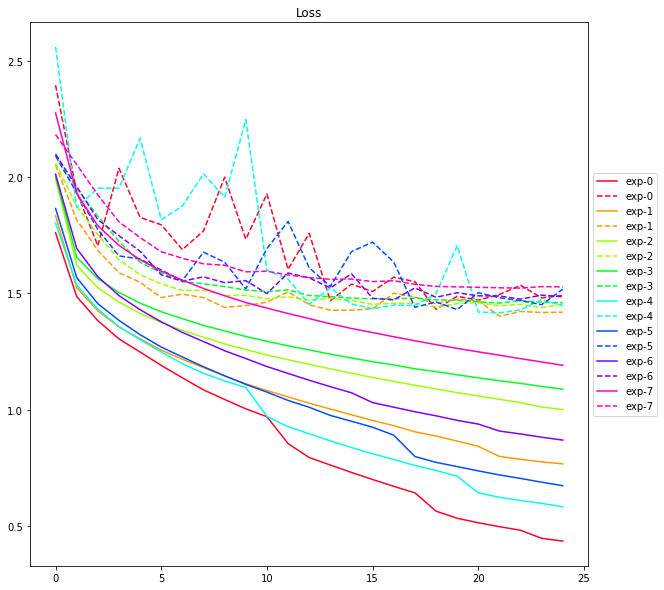

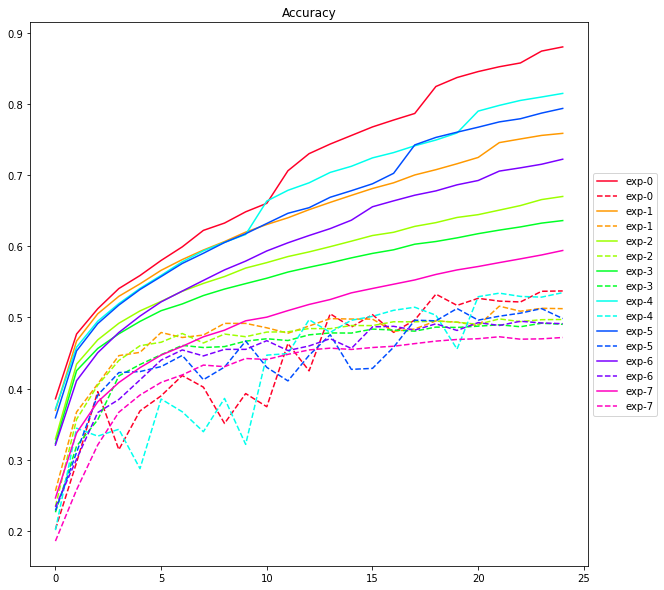

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [42]:
optimizer_set=['Adam','RMSprop']
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(
    optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, optimizers %s reduce_factor: %.2f, reduce_patient: %i" 
          % (i,optim, reduce_factor,reduce_patient))

Numbers of exp: 0, optimizers Adam reduce_factor: 0.40, reduce_patient: 4
Numbers of exp: 1, optimizers Adam reduce_factor: 0.40, reduce_patient: 7
Numbers of exp: 2, optimizers Adam reduce_factor: 0.70, reduce_patient: 4
Numbers of exp: 3, optimizers Adam reduce_factor: 0.70, reduce_patient: 7
Numbers of exp: 4, optimizers RMSprop reduce_factor: 0.40, reduce_patient: 4
Numbers of exp: 5, optimizers RMSprop reduce_factor: 0.40, reduce_patient: 7
Numbers of exp: 6, optimizers RMSprop reduce_factor: 0.70, reduce_patient: 4
Numbers of exp: 7, optimizers RMSprop reduce_factor: 0.70, reduce_patient: 7
